In [1]:
%load_ext blackcellmagic

In [2]:
import topo as tg
import importlib
import uuid
importlib.reload(tg)
node_list = [
    tg.Node(str(uuid.uuid4()), "host", 1000, 1, int(1e9), 0, 0, {}),
    tg.Node(str(uuid.uuid4()), "host", 1000, 1, int(1e9), 0, 0, {}),
    tg.Node(str(uuid.uuid4()), "host", 1000, 1, int(1e9), 0, 0, {}),
    tg.Node(str(uuid.uuid4()), "host", 1000, 1, int(1e9), 0, 0, {}),
    tg.Node(str(uuid.uuid4()), "host", 1000, 1, int(1e9), 0, 0, {}),
    tg.Node(str(uuid.uuid4()), "host", 1000, 1, int(1e9), 0, 0, {})
]
t = tg.Topology()
for n in node_list:
    t.add_node(n)
t.connect(node_list[0], node_list[1], uuid.uuid4(), int(1e7), 10)
t.connect(node_list[1], node_list[2], uuid.uuid4(), int(1e7), 2)
t.connect(node_list[1], node_list[3], uuid.uuid4(), int(1e7), 2)
t.connect(node_list[1], node_list[4], uuid.uuid4(), int(1e7), 2)
t.connect(node_list[4], node_list[5], uuid.uuid4(), int(1e7), 1)

In [3]:
import vivaldi.compute as vivaldi_compute
import vivaldi.coordinate as vivaldi_coordinate
importlib.reload(vivaldi_compute)
importlib.reload(vivaldi_coordinate)
lat_matrix = vivaldi_compute.get_latency_matrix(t, [n.uuid for n in t.get_nodes()])
print(lat_matrix)
coordinate_2d_class = vivaldi_coordinate.create_coordinate_class(2)
matrix_error = vivaldi_compute.matrix_error(lat_matrix, {n.uuid: coordinate_2d_class(0,0) for n in node_list})
print(matrix_error)

{'38475610-e9fc-487f-a67a-0080c36059e2': {'38475610-e9fc-487f-a67a-0080c36059e2': 0, '80ef25ba-6d1b-415c-a940-57e204b7edd1': 10, 'ff11b1ab-5c0e-434f-a348-4161e145c94a': 12, '99be84d3-0902-4b61-8e7f-4e8d3dbf54c1': 12, '0714c82c-8222-448d-ab83-8257bc703826': 12, '5ac29289-cbef-4de9-a89e-63b94532942c': 13}, '80ef25ba-6d1b-415c-a940-57e204b7edd1': {'38475610-e9fc-487f-a67a-0080c36059e2': 10, '80ef25ba-6d1b-415c-a940-57e204b7edd1': 0, 'ff11b1ab-5c0e-434f-a348-4161e145c94a': 2, '99be84d3-0902-4b61-8e7f-4e8d3dbf54c1': 2, '0714c82c-8222-448d-ab83-8257bc703826': 2, '5ac29289-cbef-4de9-a89e-63b94532942c': 3}, 'ff11b1ab-5c0e-434f-a348-4161e145c94a': {'38475610-e9fc-487f-a67a-0080c36059e2': 12, '80ef25ba-6d1b-415c-a940-57e204b7edd1': 2, 'ff11b1ab-5c0e-434f-a348-4161e145c94a': 0, '99be84d3-0902-4b61-8e7f-4e8d3dbf54c1': 4, '0714c82c-8222-448d-ab83-8257bc703826': 4, '5ac29289-cbef-4de9-a89e-63b94532942c': 5}, '99be84d3-0902-4b61-8e7f-4e8d3dbf54c1': {'38475610-e9fc-487f-a67a-0080c36059e2': 12, '80ef25

In [4]:
updated = vivaldi_compute.vivaldi_compute(t, {n.uuid: coordinate_2d_class(0,0) for n in node_list}, 0.01, 100)
for k, v in updated.items():
    print(k, v)

2021-08-15 18:17:13 Vancior-Redmi vivaldi.compute[6532] DEBUG initial error: 9.122
error: 0.459: 100%|██████████| 100/100 [00:00<00:00, 628.77it/s]


38475610-e9fc-487f-a67a-0080c36059e2 (-9.415260132071507,-4.3943770710372245)
80ef25ba-6d1b-415c-a940-57e204b7edd1 (0.23589728543812055,0.33580896246789654)
ff11b1ab-5c0e-434f-a348-4161e145c94a (1.8769084754851943,2.3550827424217644)
99be84d3-0902-4b61-8e7f-4e8d3dbf54c1 (-0.7187249646629271,2.2986425910403843)
0714c82c-8222-448d-ab83-8257bc703826 (1.8119195358734401,-1.2177899185759469)
5ac29289-cbef-4de9-a89e-63b94532942c (2.7389913115645017,-1.862403708585765)


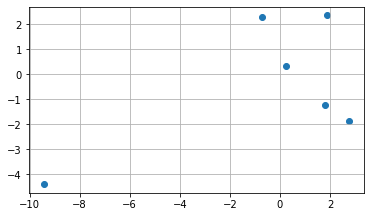

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.scatter(*zip(*updated.values()))
plt.grid(True)
plt.show()

In [6]:
import numpy as np
coords = list(updated.values())
matrix = np.zeros((len(coords), len(coords)))
for i in range(len(coords)):
    for j in range(len(coords)):
        matrix[i][j] = abs(coords[i] - coords[j])
print(matrix)

[[ 0.         10.74799979 13.15554178 10.97388883 11.66791623 12.41518092]
 [10.74799979  0.          2.60199622  2.18266339  2.21303313  3.33130885]
 [13.15554178  2.60199622  0.          2.59624699  3.57346367  4.30469265]
 [10.97388883  2.18266339  2.59624699  0.          4.33237339  5.41018559]
 [11.66791623  2.21303313  3.57346367  4.33237339  0.          1.12915412]
 [12.41518092  3.33130885  4.30469265  5.41018559  1.12915412  0.        ]]


In [7]:
import yaml
import importlib
import topo
importlib.reload(topo)
data = yaml.load(open('samples/a0.yaml', 'r').read(), Loader=yaml.Loader)
sc = topo.Scenario.from_dict(data)

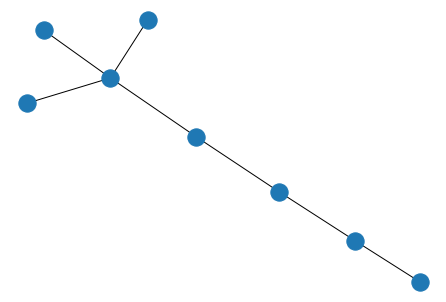

In [8]:
import networkx as nx
nx.draw(sc.topo.g)

In [9]:
coordinate_3d_class = vivaldi_coordinate.create_coordinate_class(3)
coordinate_4d_class = vivaldi_coordinate.create_coordinate_class(4)
init_coords = {n.uuid: coordinate_3d_class(0,0,0) for n in sc.topo.get_hosts()}
coords = vivaldi_compute.vivaldi_compute(sc.topo, init_coords, 1, 500)

2021-08-15 18:17:20 Vancior-Redmi vivaldi.compute[6532] DEBUG initial error: 625000000.000
error: 0.981:  26%|██▌       | 128/500 [00:00<00:00, 596.89it/s]


In [10]:
from functools import partial

cloud_node = sc.topo.get_node(list(
    filter(
        partial(sc.topo.label_filter, {"machine": "rack"}),
        [h.uuid for h in sc.topo.get_hosts()],
    )
)[0])
base_coord = coords[cloud_node.uuid]
coords = {k: v - base_coord for k, v in coords.items()}
for k, v in coords.items():
    print(k, v)

d60a1612-0896-4fa4-a3ca-23d117db0fe6 (0.0,0.0,0.0)
cca760d2-1c78-4bbb-9df5-1221e6d9518a (63064.493975117424,28200.0672896147,-11305.230926627828)
997441d2-4c20-428d-a003-8fdfd488b386 (62051.17524730753,24925.490704985732,-20699.172859137056)
ddbe4e23-5cb5-4cb1-b34d-d979af64c187 (65976.25911614018,18941.596203574438,-13714.159000577376)


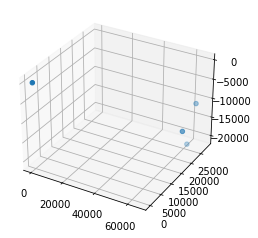

In [11]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.set_aspect(1)
ax.scatter3D(*zip(*coords.values()))
# plt.grid(True)
plt.show()